In [6]:
"""First upload dataset on google colab"""
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Titanic_dataset.csv to Titanic_dataset (1).csv
User uploaded file "Titanic_dataset (1).csv" with length 67270 bytes


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv('Titanic_dataset.csv')
df.head()
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  AgeGroup     891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


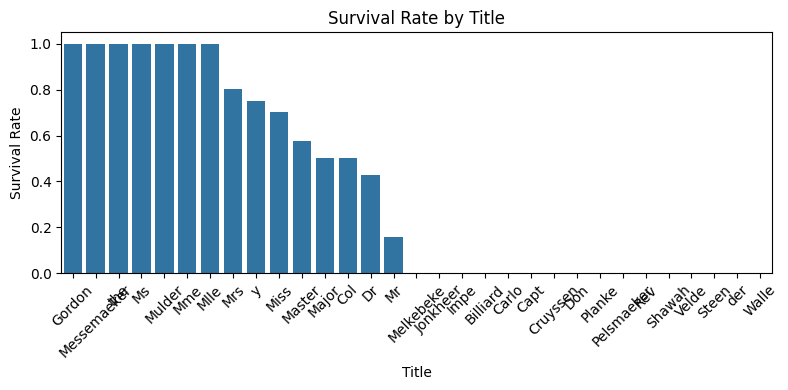

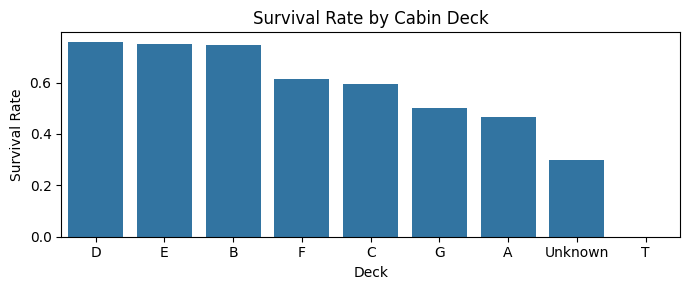

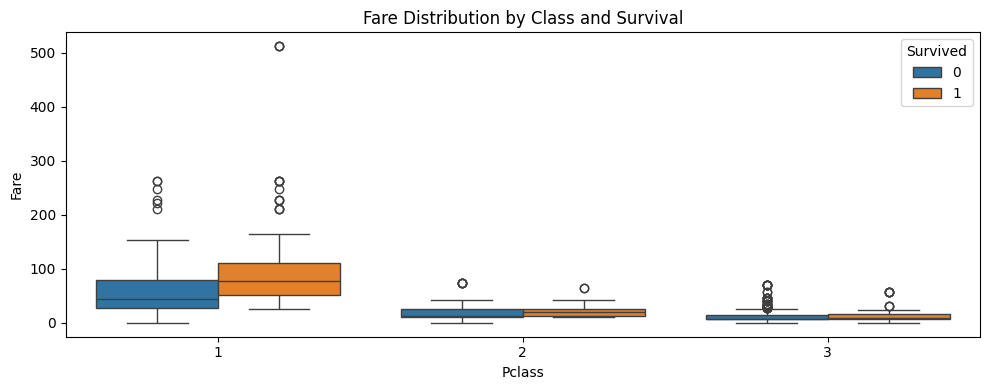

In [16]:
df['Age']=df['Age'].fillna(df['Age'].median())

df['Cabin']=df['Cabin'].fillna('Unknown')




def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)', name)
    if title_search:
        return title_search.group(1)
    return ""
df['Title'] = df['Name'].apply(extract_title)

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['Deck'] = df['Cabin'].apply(lambda x: str(x)[0] if x != 'Unknown' else 'Unknown')

df['AgeGroup'] = pd.cut(df['Age'], [0,12,18,35,60,90], labels=['Child','Teen','Adult','Middle_Aged','Senior'])

title_survival = df.groupby('Title')['Survived'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=title_survival.index, y=title_survival.values)
plt.xticks(rotation=45)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

deck_survival = df.groupby('Deck')['Survived'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,3))
sns.barplot(x=deck_survival.index, y=deck_survival.values)
plt.title('Survival Rate by Cabin Deck')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,4))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Fare Distribution by Class and Survival')
plt.tight_layout()
plt.show()